In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from google.colab import drive

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/USP/2024_1º/ACH2177 - Introdução à Ciência de Dados')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 20)

In [32]:
csv_file = 'AirbnbRJRentals.csv'
df = pd.read_csv(csv_file, encoding='utf-8-sig', sep=',').dropna()
df_price = df[['room_type', 'price', 'number_of_reviews', 'availability_365']].copy()

In [33]:
# cut outliers

df_price = df_price[df_price.price < df_price.price.std()]
df_price

,room_type,price,number_of_reviews,availability_365
0,Entire home/apt,581,2,181
3,Private room,599,1,363
5,Entire home/apt,494,92,228
6,Entire home/apt,657,2,241
10,Private room,500,17,90
...,...,...,...,...
28294,Entire home/apt,135,71,211
28296,Entire home/apt,871,1,365
28297,Entire home/apt,194,50,259
28298,Entire home/apt,153,18,58


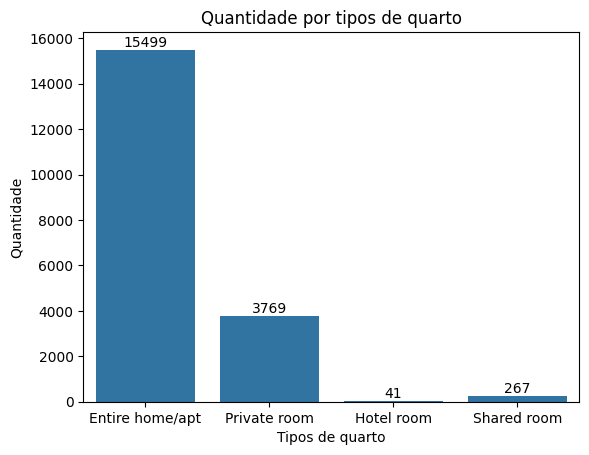

In [55]:
# Qual a distribuição de preços entre os tipos de acomodação?

ax = sns.countplot(
    data=df_price,
    x='room_type',
)

ax.bar_label(ax.containers[0])
ax.set_title('Quantidade por tipos de quarto')
ax.set_xlabel('Tipos de quarto')
ax.set_ylabel('Quantidade')
ax.grid(False)

plt.show()

In [ ]:
# E como isso é visto na quantidade de reservas?

In [ ]:
# O preço por si só afeta a disponibilidade?